<a href="https://colab.research.google.com/github/CodeKiller1234/Hotel_review_Sentimental_analysis/blob/main/Hotel_review_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP - Hotel review sentimental analysis in python**

Data Import

In [ ]:
#warning :)
import warnings
warnings.filterwarnings('ignore')
 

import pandas as pd
#Local directory
df=pd.read_csv('/content/train.csv',encoding='iso-8859-1',nrows=6740)
#Data Credit - https://www.kaggle.com/datasets/anu0012/hotel-review


In [ ]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


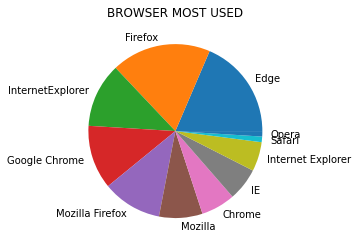

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Browser_most_used = df['Browser_Used'].value_counts()

plt.pie(Browser_most_used,labels=Browser_most_used.index)
plt.title('BROWSER MOST USED')
plt.show()





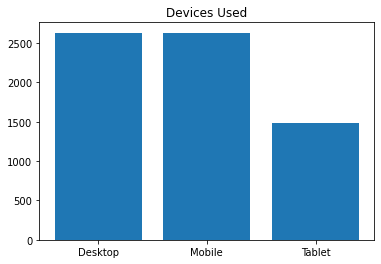

In [ ]:
device_counts = df['Device_Used'].value_counts()


plt.bar(device_counts.index, device_counts)
plt.title('Devices Used')
plt.show()

In [ ]:
df.shape

(6740, 5)

**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6740 entries, 0 to 6739
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       6740 non-null   object
 1   Description   6740 non-null   object
 2   Browser_Used  6740 non-null   object
 3   Device_Used   6740 non-null   object
 4   Is_Response   6740 non-null   object
dtypes: object(5)
memory usage: 263.4+ KB


In [ ]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
df.describe().transpose()

,count,unique,top,freq
User_ID,6740,6740,id10326,1
Description,6740,6740,The room was kind of clean but had a VERY stro...,1
Browser_Used,6740,11,Edge,1251
Device_Used,6740,3,Desktop,2632
Is_Response,6740,2,happy,4559


In [ ]:
#Checking Missing Values in the Data Setand printing the Precentage for Missing Values for Each Columns

count=df.isna().sum().sort_values(ascending=True)
percentage= ((df.isna().sum()/len(df)*100)).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


checking into the data set,what percentage of records is Happy sentiment and what percentage of record is NOT-Happy sentiment

happy        68.0
not happy    32.0
Name: Is_Response, dtype: float64


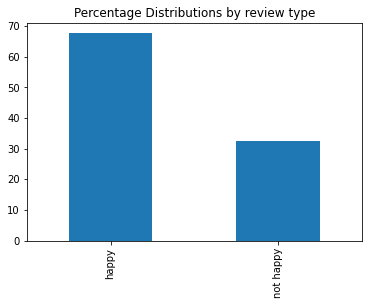

In [ ]:
import matplotlib.pyplot as plt
plt.title('Percentage Distributions by review type')
%matplotlib inline
print(round(df.Is_Response.value_counts(normalize=True)*100.2))
round(df.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')


plt.show()

<Axes: ylabel='Is_Response'>

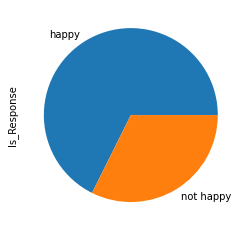

In [ ]:
round(df.Is_Response.value_counts(normalize=True)*100,2).plot(kind='pie')


In [ ]:
Browser_used = df['Browser_Used'].value_counts(normalize=True)*100

In [ ]:
#removing unnecessary columns
df.drop(columns=['User_ID','Browser_Used','Device_Used'],inplace=True)

In [ ]:
#apply first level cleaning
import re
import string

#this function coverts to lower-case , removes square brackets,remove numbers and punctuation

def text_clean_1(text):
  text=text.lower()
  text=re.sub('\[.*?\]','',text)  #remove brackets
  text=re.sub('[%s]' % re.escape(string.punctuation), '',text) #remove punctuations
  text=re.sub('\w*\d\w*','',text)  #remove digits
  return text

cleaned_data1=lambda x:text_clean_1(x)

In [ ]:
#lets view our cleaned data and current data columns side by side
df['Cleaned_description']=pd.DataFrame(df.Description.apply(cleaned_data1))
df.head(15)

,Description,Is_Response,Cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


After this cleaning in the data i have found some , and '' ,we have to remve that as well

In [ ]:
def text_clean2(text):
  text=re.sub('[''""_]','',text)
  text=re.sub('\n','',text)
  return text

cleaned_data2 = lambda x :text_clean2(x)

In [ ]:
#Lets take a look at the updated text
df['Cleaned_description_new']=pd.DataFrame(df['Cleaned_description'].apply(cleaned_data2))
df.head(10)

,Description,Is_Response,Cleaned_description,Cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


**Model training**

In [ ]:
from sklearn.model_selection import train_test_split
X=df.Cleaned_description_new
y=df.Is_Response

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=23)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf =TfidfVectorizer()
clf=LogisticRegression(solver='lbfgs')

from sklearn.pipeline import Pipeline

model =Pipeline([('vectorizer',tfidf),('classifier',clf)])

model.fit(X_train,y_train)



Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

confusion_matrix(y_pred,y_test)

array([[1310,  212],
       [  79,  421]])

accuracy of: 85.60830860534125




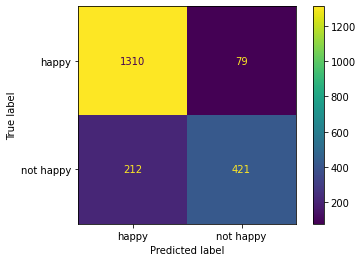

In [ ]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

print("accuracy of:",accuracy_score(y_test,y_pred)*100)
print("\n")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**Trying on news reviews**

In [ ]:
ex = ["I'm not satisfied"]
result = model.predict(ex)

print(result)

['not happy']
